## Assignment Three

In [1]:
import pandas as pd 
import numpy as numpy 
import matplotlib.pyplot as plt
import sklearn

crimeData = pd.read_csv("crime.csv")
kidneyData = pd.read_csv("kidney_disease.csv", na_values=["?", "\t?"])

### Question 1:

In [2]:
violentCrimeStatistics = crimeData["ViolentCrimesPerPop"]

violentCrimeStatistics.describe()

# The distribution appears to be slightly right-skewed, this is because the mean is greater than the median
# (0.44191) > (0.390000)

# Mean is significantly more affected by outliers/extreme values as its taking in
# ALL of the values from the dataset, and dividing it by the sample size.
# As a result, there can be very large descrepancies if there are certain extreme values,
# as compared to median, which takes the 50th percentile of the data, which is as not easily swayed,
# requiring "more" samples in order to sway it.

count    319.000000
mean       0.441191
std        0.276351
min        0.020000
25%        0.210000
50%        0.390000
75%        0.650000
max        1.000000
Name: ViolentCrimesPerPop, dtype: float64

### Question 2:

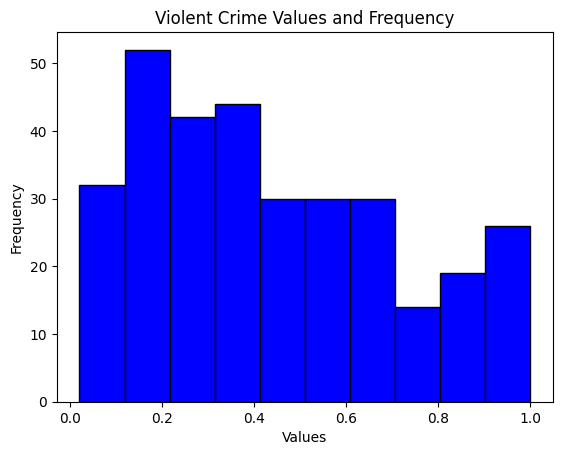

Text(0.5, 1.0, 'Violent Crime Values and their Spread')

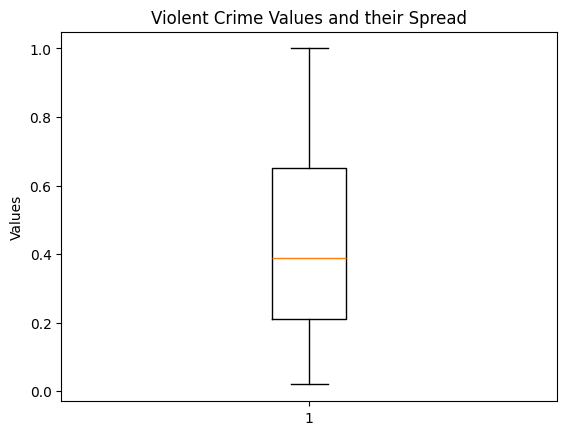

In [3]:
plt.hist(violentCrimeStatistics, color='blue', edgecolor='black')

plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Violent Crime Values and Frequency')

plt.show()

#---------------------------

plt.boxplot(violentCrimeStatistics)

plt.xlabel('')
plt.ylabel('Values')
plt.title('Violent Crime Values and their Spread')

# The histogram shows that the violent crime statistics are fairly evenly distributed, with a slight right skew, 
# which is seen within the bins (0.0-0.2), and (0.2-0.4).

# It appears that the data set displays a right skewness due to the median behind a little bit lower (rather than being in the dead middle), 
# which can be seen from the uneven distance between the median and Q2 and Q3.

# There are no outliers within this dataset, with the upper and lower whisker limits capturing all values within the dataset.

### Question Three

In [4]:
#classification --> ckd, notckd
from sklearn.model_selection import train_test_split

def classificationLabelling(classification):
    if classification == "ckd":
        return 0
    else:
        return 1

X = kidneyData.drop(['id', 'sg', 'al', 'su', 'bu', 'sc', 'rbc', 'pc', 'pcc', 'ba', 'htn', 'cad', 'appet', 'pe', 'ane', 'dm'], axis=1) # Feature
X = X.dropna()

Y = X["classification"].apply(classificationLabelling) # Label
X = X.drop(["classification"], axis=1)

print(X.head())

xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size=0.30, random_state=42)

# Using the same data to train, and test would only lead to the model "memorizing" the data, which leads to overfitting, and an unrealistic measure on the
# performance of the model.

# Testing data is supposed to measure the models performance on unseen/new data, essentially simulating how it would perform in the real world.

     age    bp    bgr    sod  pot  hemo   pcv       wc   rc
3   48.0  70.0  117.0  111.0  2.5  11.2  32.0   6700.0  3.9
5   60.0  90.0   74.0  142.0  3.2  12.2  39.0   7800.0  4.4
9   53.0  90.0   70.0  114.0  3.7   9.5  29.0  12100.0  3.7
11  63.0  70.0  380.0  131.0  4.2  10.8  32.0   4500.0  3.8
12  68.0  70.0  208.0  138.0  5.8   9.7  28.0  12200.0  3.4


### Question Four

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


knnModel = KNeighborsClassifier(n_neighbors=5)

knnModel.fit(xTrain, yTrain)

yPrediction = knnModel.predict(xTest)

confusionMatrix = confusion_matrix(yTest, yPrediction)
accuracy =  accuracy_score(yTest, yPrediction)
precision = precision_score(yTest, yPrediction)
recall = recall_score(yTest, yPrediction)
f1Score = f1_score(yTest, yPrediction)

print(f"Confusion Matrix: \n{confusionMatrix}\n")
print(f"Accuracy: {accuracy}\n")
print(f"Precision Score: {precision}\n")
print(f"Recall SCore: {recall}\n")
print(f"F1 Score {f1Score}\n")

# True Positive means that the model predicted the patient to have Chronic Kidney Disease (CKD),
# when in reality they do. This is the same for True Negative, except vice versa

# False Positive, or Type II Error, means the model predicted the patient is positive for CKD, when in reality,
# they do not.

# False Negative, or Type I Error, means the model predicted the patient is negative for CKD, when in reality,
# they do.

# Accuracy may be the correct predictions the model gets, but equal weight is put into both Type II, and Type I
# errors. The reality is that, especially with the data within this assignment, the risks of a Type Error within a model
# can be devastating for people, and are extremely costly for the healthcare provider.

# The F1 score melds both recall, and precision into one metric, which helps to balance out Type Error weightings in models,
# this means that Type Errors are accurately weighted for the risk of Type Errors when compared to True Negatives/Positives.abs



Confusion Matrix: 
[[ 8 15]
 [ 4 39]]

Accuracy: 0.7121212121212122

Precision Score: 0.7222222222222222

Recall SCore: 0.9069767441860465

F1 Score 0.8041237113402062



### Question Five